# **Exploratory Data Analysis**


 Perform the task of exploratory data analysis.
Find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


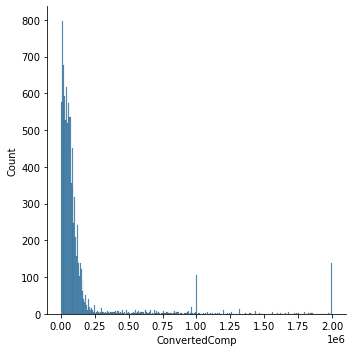

In [3]:
sns.displot(df['ConvertedComp'])
plt.show()

Plot the histogram for the column `ConvertedComp`.


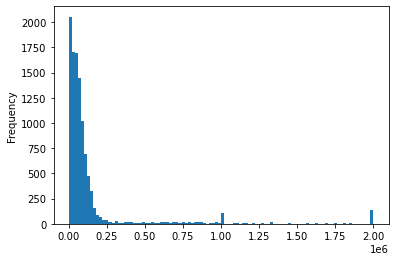

In [13]:
df['ConvertedComp'].plot.hist(bins=100)
plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [32]:
df[df['Gender'] == 'Man'].count()

Respondent      10480
MainBranch      10480
Hobbyist        10480
OpenSourcer     10480
OpenSource      10411
                ...  
Sexuality       10047
Ethnicity        9873
Dependents      10347
SurveyLength    10464
SurveyEase      10467
Length: 85, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [37]:
df.loc[(df['Gender'] == 'Woman'),'ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


In [38]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


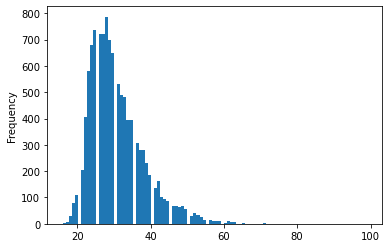

In [39]:
df['Age'].plot.hist(bins=100)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


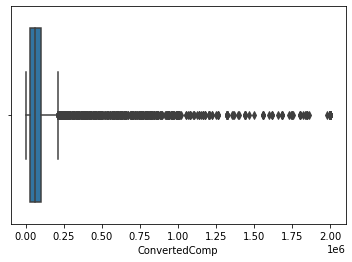

In [51]:
sns.boxplot(x='ConvertedComp',data=df)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [54]:
# your code goes here
print(df['ConvertedComp'].describe())
IQR = df['ConvertedComp'].describe()[6] - df['ConvertedComp'].describe()[4]

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64


Find out the upper and lower bounds.


In [55]:
upper_bound = df['ConvertedComp'].describe()[6] + 1.5*IQR
lower_bound = df['ConvertedComp'].describe()[4] - 1.5*IQR

Identify how many outliers are there in the `ConvertedComp` column.


In [67]:
df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)].count()

Respondent      0
MainBranch      0
Hobbyist        0
OpenSourcer     0
OpenSource      0
               ..
Sexuality       0
Ethnicity       0
Dependents      0
SurveyLength    0
SurveyEase      0
Length: 85, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [66]:
df.drop(df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)].index,inplace=True)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [69]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000
